## Construction and Training of NN

In [74]:
import numpy as np

# initialize possible inputs, and the target outputs (for XOR)
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
target_output = np.array([[0],[1],[1],[0]])

# initialize intial weights and biases randomly based on a uniform distribution
hidden_weights = np.random.uniform(size=(2,2)) # four weights in all between input layer and hidden layer
hidden_biases = np.random.uniform(size=(1,2)) # two biases for two hidden layer neurons
output_weights = np.random.uniform(size=(2,1)) # two weights between hidden layer and output layer
output_biases = np.random.uniform(size=(1,1)) # one bias for output layer neuron

print("initial hidden weights: ", hidden_weights)
print("initial hidden biases: ", hidden_biases)
print("initial output weights: ", output_weights)
print("initial output biases: ", output_biases)

# number of gradient descent steps we take when training our model
num_loops = 8000

# learning rate
learning_rate = 0.5

# list of errors after each gradient descent step
errors = []

initial hidden weights:  [[0.30281603 0.12358081]
 [0.5436969  0.16916807]]
initial hidden biases:  [[0.26919766 0.81359229]]
initial output weights:  [[0.05765286]
 [0.13046898]]
initial output biases:  [[0.36121122]]


In [75]:
# sigmoid function will be our activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# we will need the derivative of the sigmoid function when performing backpropogation
def sigmoid_derivative(x):
    return x * (1 - x)

In [76]:
# train our model
for i in range(num_loops):
    
    # forward propogation
    
    # the output of the hidden layer is the sigmoid of the sum of the weighted inputs and the hidden biases
    hidden_layer_activation = np.dot(inputs,hidden_weights) + hidden_biases
    hidden_layer_activation += hidden_biases
    hidden_layer_output = sigmoid(hidden_layer_activation) 
    
    # the output of the output layer is the sigmoid of the sum of the weighted hidden layer outputs and the output biases
    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_biases
    predicted_output = sigmoid(output_layer_activation)
    
    # backpropagation
    error = target_output - predicted_output
    errors.append(error)
    
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # update weights and biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_biases += np.sum(d_predicted_output,axis=0,keepdims=True) * learning_rate
    hidden_weights += inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_biases += np.sum(d_hidden_layer,axis=0,keepdims=True) * learning_rate


print("final hidden weights: ", hidden_weights)
print("final hidden biases: ", hidden_biases)
print("final output weights: ", output_weights)
print("final output biases: ", output_biases)

final hidden weights:  [[6.46527326 4.85143631]
 [6.49209849 4.85946802]]
final hidden biases:  [[-1.48388698 -3.76255319]]
final output weights:  [[ 8.99845842]
 [-9.68871058]]
final output biases:  [[-4.18828637]]


## Output

In [77]:
predicted_output = np.where(predicted_output > 0.5, 1, 0)
print("the predicted output of the XOR input after training is: ", "\n", predicted_output)

the predicted output of the XOR input after training is:  
 [[0]
 [1]
 [1]
 [0]]


## Error Analysis

In [78]:
import pandas as pd

sum_of_squared_errors = []

for x in errors:
    sse = 0
    for y in x:
         sse += y[0] ** 2
    sum_of_squared_errors.append(sse)

data = {'Error': sum_of_squared_errors, 'Number of Steps': [s for s in range(1, num_loops + 1)]} 
df = pd.DataFrame(data) 

df


,Error,Number of Steps
0,1.063033,1
1,1.035592,2
2,1.019491,3
3,1.010541,4
4,1.005724,5
...,...,...
7995,0.001674,7996
7996,0.001674,7997
7997,0.001674,7998
7998,0.001673,7999


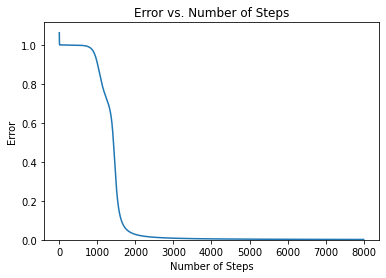

In [79]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(df['Number of Steps'], df['Error'])
plt.title("Error vs. Number of Steps")
plt.xlabel('Number of Steps')
plt.ylabel('Error')
plt.ylim(ymin=0)
plt.show()
